In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16,8]
plt.rcParams.update({'font.size': 18})

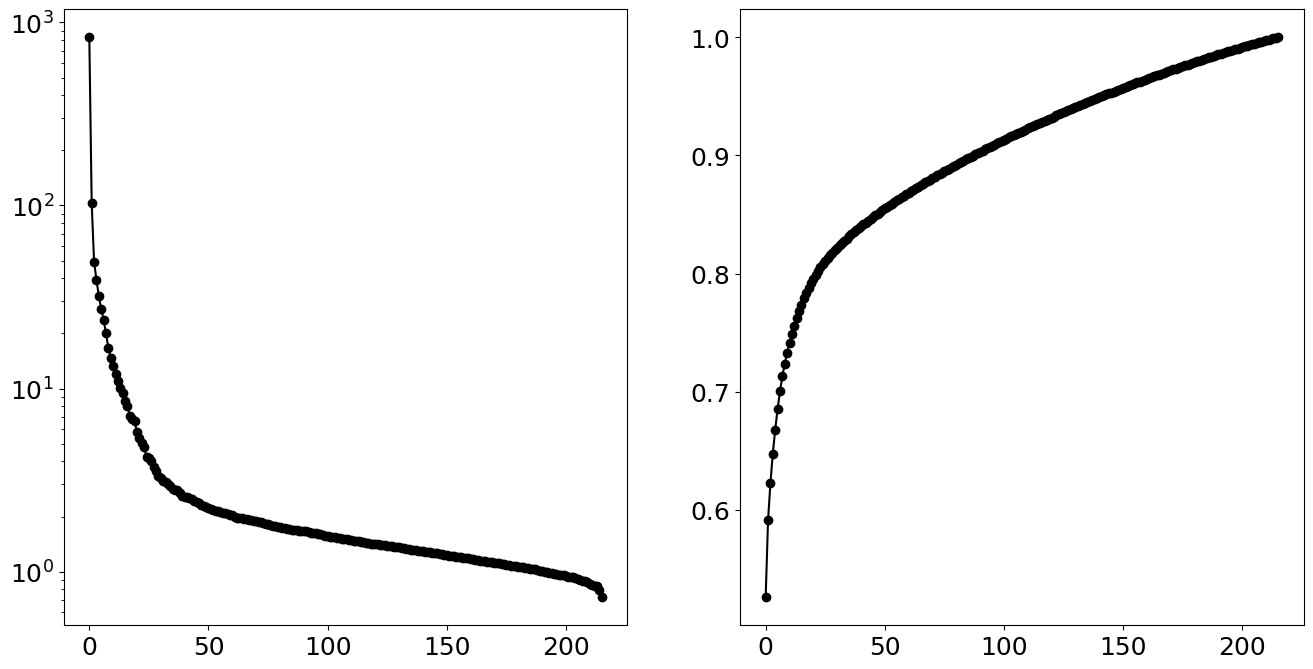

In [8]:
obs_path = os.path.join('..', 'data', 'ovariancancer_obs.csv')
obs = np.loadtxt(obs_path, delimiter=',')

grp_path = os.path.join('..', 'data', 'ovariancancer_grp.csv')
f = open(grp_path, 'r')
grp = f.read().split('\n')

U, S, VT = np.linalg.svd(obs, full_matrices=0)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S, '-o', color='k')
ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/ np.sum(S), '-o', color='k')

plt.show()

The grahs represent the log of the diagonal elements of sigma (left) and on the right are the cumulative elements of sigma. Showing how much variance is being captured by the r singular vector. On the right shows about ~55% of the data matrix being captured from the first singular vector. 

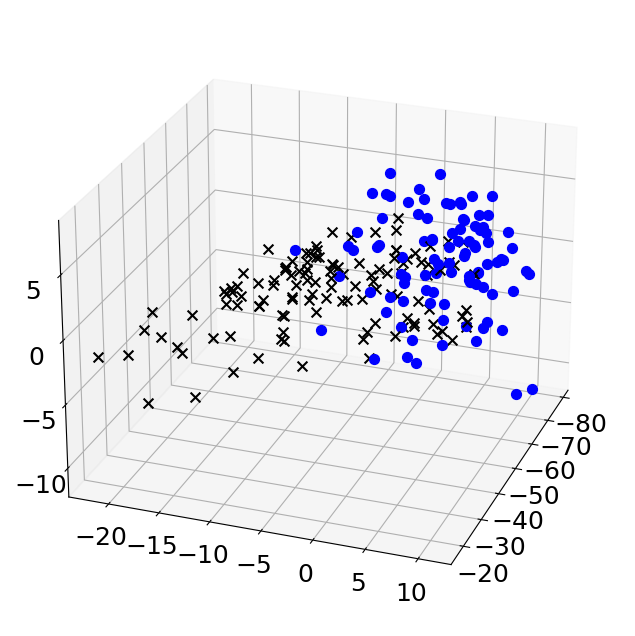

In [12]:
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]):
    x = VT[0, :] @ obs[j, :].T
    y = VT[1, :] @ obs[j, :].T
    z = VT[2, :] @ obs[j, :].T
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z, marker='x', color='k', s=50)
    else:
        ax.scatter(x,y,z, marker='o', color='b', s=50)

ax.view_init(25, 20)
plt.show() 

If you transpose a matrix, then in the decomposition you're going to get the inversed order. So, in other words, U plays the role of eigenmixtures and VT plays the row of having the eigengenes in each for. 